In [ ]:
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [ ]:
df = pd.read_csv('FinecoDJI.csv')
df.head()

,Month,Mkt-RF,SMB,HML,RMW,CMA,RF,WML,Vol,Change,DJI
0,199011,6.35,-0.04,-3.21,0.83,-4.75,0.57,0.08,19.57M,4.80%,"2,559.65"
1,199012,2.46,0.59,-1.72,2.84,-2.00,0.60,-2.64,18.38M,2.89%,"2,633.66"
2,199101,4.69,3.86,-1.74,1.56,-4.08,0.52,-1.69,22.23M,3.90%,"2,736.39"
3,199102,7.19,3.97,-0.55,-0.25,-0.16,0.48,-7.45,29.73M,5.33%,"2,882.18"
4,199103,2.65,3.85,-1.32,-0.37,-0.99,0.44,1.95,24.24M,1.10%,"2,913.86"


In [ ]:
def metrics(y_test,pred):
    print("ACC : ",accuracy_score(y_test,pred))
    print("Precision : ", precision_score(y_test,pred))
    print("recall(TP rate) : ", recall_score(y_test,pred))
    print("F1 : " , f1_score(y_test,pred))
    print("ROC SCORE : ", roc_auc_score(y_test,pred,average="macro"))

In [ ]:
FLU = list()
for i in range(len(df)):
    if(float(str(df.loc[i][9])[:-1])>0):
        #print(df.loc[i][0],'higher')
        FLU.append(1) #if DJI become high, label high
    else:
        #print(df.loc[i][0],'lower')
        FLU.append(0) #if DJI become lower, label lower
for i in range(len(df)):
    if(df.loc[i][8][-1]=='K'):
        df.at[i,'Vol'] = int(float(df.loc[i][8][:-1])*1000)#K
    elif(df.loc[i][8][-1]=='M'):
        df.at[i,'Vol'] = int(float(df.loc[i][8][:-1])*1000000)#M
    elif(df.loc[i][8][-1]=='B'):
        df.at[i,'Vol'] = int(float(df.loc[i][8][:-1])*1000000000)#B

df = df.assign(FLU = FLU)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f06c32b2510>,
      dtype=object)

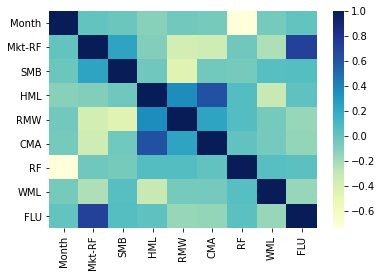

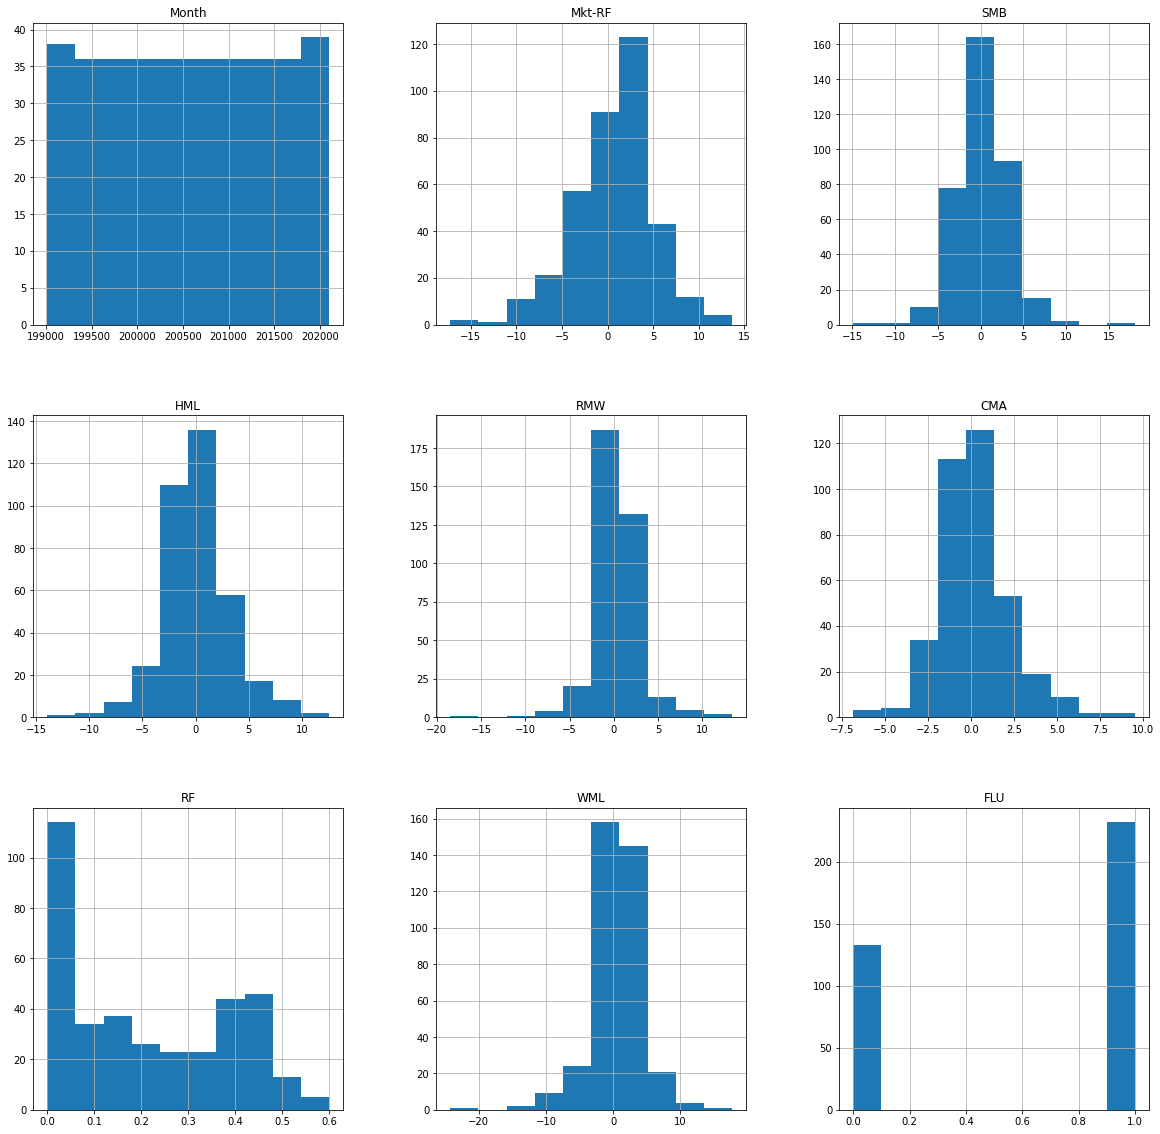

In [ ]:
sns.heatmap(df.corr(),cmap="YlGnBu")
df.hist(figsize=(20,20))

In [ ]:


df = df.astype({'Vol':'int'})#Type Change
df = df.drop(columns = ["Change",'DJI','Month','Vol','RF','WML'])#Too Correlated
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  365 non-null    float64
 1   SMB     365 non-null    float64
 2   HML     365 non-null    float64
 3   RMW     365 non-null    float64
 4   CMA     365 non-null    float64
 5   FLU     365 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 17.2 KB


ACC :  0.8478260869565217
Precision :  0.9259259259259259
recall(TP rate) :  0.8333333333333334
F1 :  0.8771929824561403
ROC SCORE :  0.8541666666666667


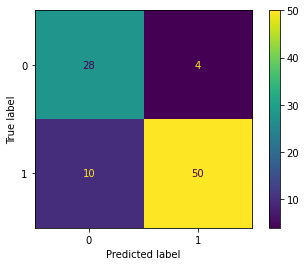

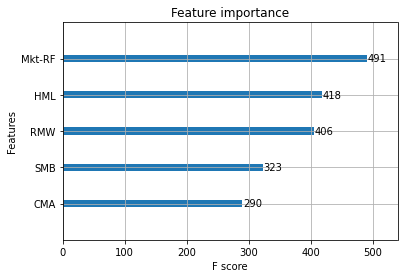

In [ ]:
Y = df.FLU # y Set
X = df.drop(columns=["FLU"]) # Train data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42) 
rnd_clf = XGBClassifier(n_estimators=500,n_jobs=-1)
rnd_clf.fit(X_train,y_train)
y_preds = rnd_clf.predict(X_test)
plot_confusion_matrix(rnd_clf,X_test,y_test)
xgboost.plot_importance(rnd_clf)
metrics(y_test,y_preds)

In [ ]:
for name, score in zip(df[:],rnd_clf.feature_importances_): ## RF 적 방법으로 변수 중요도 추출
    print(name, score)

Mkt-RF 0.6321457
SMB 0.11190233
HML 0.068568446
RMW 0.085563935
CMA 0.10181957
